In [39]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [40]:
import os
import numpy as np
import pandas as pd
import time

import re

#pd.set_option('display.max_row',None)
pd.set_option('display.max_columns',None)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings('ignore',category=FutureWarning)

In [ ]:
DATASET_ROOT = '/content/drive/MyDrive/機械学習/Competitions/Signate/SOTA [住宅予測]'
INPUT_DIR = os.path.join(DATASET_ROOT,'input')
OUTPUT_DIR = os.path.join(DATASET_ROOT,'output')
orig_train = pd.read_csv(os.path.join(INPUT_DIR,'train.csv'))
#test = pd.read_csv(os.path.join(INPUT_DIR,'test.csv'))
train = pd.read_csv(os.path.join(INPUT_DIR,'train_enginiring.csv'))
test = pd.read_csv(os.path.join(INPUT_DIR,'test_enginiring.csv'))
sub = pd.read_csv(os.path.join(INPUT_DIR,'sample_submit.csv'),names=('id','賃料'))
#df = pd.read_csv(os.path.join(INPUT_DIR,'Simple_DataFrame.csv'))
train.head()

,賃料,adr2,adr3,adr4,distance0,distance1,distance2,age,area,withstorage,thisfloor,maxfloor,シャワー,トイレなし,バスなし,バス・トイレ別,共同トイレ,共同バス,専用トイレ,専用バス,洗面台独立,浴室乾燥機,温水洗浄便座,脱衣所,追焚機能,IHコンロ,L字キッチン,カウンターキッチン,ガスコンロ,コンロ1口,コンロ2口,コンロ3口,コンロ4口以上,コンロ設置可(コンロ1口),コンロ設置可(コンロ2口),コンロ設置可(コンロ3口),コンロ設置可(コンロ4口以上),コンロ設置可(口数不明),システムキッチン,冷蔵庫あり,独立キッチン,給湯,電気コンロ,BSアンテナ,CATV,CSアンテナ,インターネット使用料無料,インターネット対応,光ファイバー,有線放送,高速インターネット,24時間換気システム,2面採光,3面採光,ウォークインクローゼット,エアコン付,エレベーター,オール電化,ガスその他,ガス暖房,クッションフロア,シューズボックス,タイル張り,トランクルーム,バリアフリー,バルコニー,フローリング,プロパンガス,ペアガラス,ルーフバルコニー,ロフト付き,下水,二世帯住宅,二重サッシ,井戸,公営水道,冷房,出窓,地下室,室内洗濯機置場,室外洗濯機置場,専用庭,床下収納,床暖房,排水その他,敷地内ごみ置き場,水道その他,汲み取り,洗濯機置場なし,浄化槽,石油暖房,都市ガス,防音室,【クリーニング】,【コインパーキング】,【コンビニ】,【スーパー】,【デパート】,【ドラッグストア】,【レンタルビデオ】,【公園】,【図書館】,【大学】,【学校】,【小学校】,【幼稚園・保育園】,【月極駐車場】,【病院】,【総合病院】,【郵便局】,【銀行】,【飲食店】,park_bike,park_motor,park_car,contr,設備_sum,Place_countall,Access_countall,Room_countall,Passed_countall,Angle_countall,Area_countall,Floor_countall,Bath_countall,Kitchen_countall,Internet_countall,Facility_countall,Parking_countall,Building_countall,Material_countall,Contract_countall,count_Room,Place_ku_countall,Num_of_Null,Building_element_count,Facility_element_count,Kitchen_element_count,Bath_element_count,Internet_element_count,Contract_imp,Passed_year_Countall,Have_UnderGround,Building_floor_Countall,Building_story_Countall,Have_Parking,Parking_yen,Parking_meter,Have_Bike,Bike_yen,Bike_meter,Have_Cycle,Cycle_yen,Cycle_meter,parking_sum_yen,parking_sum_meter,parking_sum_exist,Label_Place,Label_Room,Label_Angle,Label_Place_ku,Label_Material,Floor_count,Floor_total,distance_mean,distance_std,distance_max,distance_min,distance2048,Label_adr1,Label_line0,Label_station0,Label_line1,Label_station1,Label_line2,Label_station2,adr1_countall,line0_countall,station0_countall,line1_countall,station1_countall,line2_countall,station2_countall,floorplan_countall,line0_groupby_targetmean,station0_groupby_targetmean,line1_groupby_targetmean,station1_groupby_targetmean,line2_groupby_targetmean,station2_groupby_targetmean,floorplan_groupby_targetmean,建物構造_groupby_targetmean,方角_groupby_targetmean,area_to_station0,area_compe_station0mean,age_to_station0,age_compe_station0mean,distance0_to_station0,distance0_compe_station0mean,thisfloor_to_station0,thisfloor_compe_station0mean,maxfloor_to_station0,maxfloor_compe_station0mean,area_to_station1,area_compe_station1mean,age_to_station1,age_compe_station1mean,distance1_to_station1,distance1_compe_station1mean,thisfloor_to_station1,thisfloor_compe_station1mean,maxfloor_to_station1,maxfloor_compe_station1mean,area_to_station2,area_compe_station2mean,age_to_station2,age_compe_station2mean,distance2_to_station2,distance2_compe_station2mean,thisfloor_to_station2,thisfloor_compe_station2mean,maxfloor_to_station2,maxfloor_compe_station2mean,area_to_adr0,area_compe_adr0mean,age_to_adr0,age_compe_adr0mean,thisfloor_to_adr0,thisfloor_compe_adr0mean,maxfloor_to_adr0,maxfloor_compe_adr0mean,area_to_adr1,area_compe_adr1mean,age_to_adr1,age_compe_adr1mean,thisfloor_to_adr1,thisfloor_compe_adr1mean,maxfloor_to_adr1,maxfloor_compe_adr1mean,area_to_line0,area_compe_line0mean,age_to_line0,age_compe_line0mean,thisfloor_to_line0,thisfloor_compe_line0mean,maxfloor_to_line0,maxfloor_compe_line0mean,area_to_line1,area_compe_line1mean,age_to_line1,age_compe_line1mean,thisfloor_to_line1,thisfloor_compe_line1mean,maxfloor_to_line1,maxfloor_compe_line1mean,area_to_line2,area_compe_line2mean,age_to_line2,age_compe_line2mean,thisfloor_to_line2,thisfloor_compe_line2mean,maxfloor_to_line2,maxfloor_compe_line2mean,area_to_方角,area_compe_方角mean,age_to_方角,age_compe_方角mean,thisfloor_to_方角,thisfloor_compe_方角mean,maxfloor_to_方角,maxfloor_compe_方角mean,area_to_建物構造,area_compe_建物構造mean,age_to_建物構造,age_compe_建物構造mean,thisfloor_to_建物構造,thisfloor_compe_建物構造mean,maxfloor_to_建物構造,maxfloor_compe_建物構造mean,area_to_floorplan,area_compe_floorplanmean,age_to_floorplan,age_compe_floorplanmean,thisfloor_to_floorplan,thisfloor_compe_floorplanmean,maxfloor_to_floorplan,maxfloor_compe_floorplan

In [ ]:
print(train.shape,test.shape)

(31470, 290) (31262, 291)


In [ ]:
train_idx = train.shape[0]

In [ ]:
drop_list = ['id','Place','Access','Room','Passed','Angle','Floor','Bath','Kitchen','Internet','Facility','Parking','Building','Material','Contract','Place_ku']

In [ ]:
df.drop(drop_list,axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62732 entries, 0 to 62731
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     62732 non-null  float64
 1   Place_countall           62732 non-null  int64  
 2   Access_countall          62732 non-null  int64  
 3   Room_countall            62732 non-null  int64  
 4   Passed_countall          62732 non-null  int64  
 5   Angle_countall           62732 non-null  int64  
 6   Area_countall            62732 non-null  int64  
 7   Floor_countall           62732 non-null  int64  
 8   Bath_countall            62732 non-null  int64  
 9   Kitchen_countall         62732 non-null  int64  
 10  Internet_countall        62732 non-null  int64  
 11  Facility_countall        62732 non-null  int64  
 12  Parking_countall         62732 non-null  int64  
 13  Building_countall        62732 non-null  int64  
 14  Material_countall     

In [ ]:
train_df = df[:train_idx]
test_df = df[train_idx:]

In [ ]:
print(train_df.shape,test_df.shape)

(31470, 52) (31262, 52)


In [ ]:
target_col = '賃料'
orig_train[target_col] = np.where(orig_train['id']==5776, 120350, orig_train[target_col])
target = orig_train[target_col]

In [ ]:
target = np.log(target)

In [ ]:
target.describe()

count    31470.000000
mean        11.562220
std          0.458891
min         10.126631
25%         11.238489
50%         11.532728
75%         11.820410
max         14.731801
Name: 賃料, dtype: float64

歪度 : 0.648496
尖度 : 1.096282


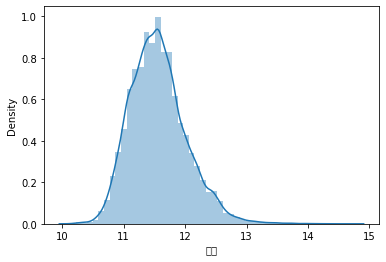

In [ ]:
print('歪度 : %f' %target.skew())
print('尖度 : %f' %target.kurt())

sns.distplot(target)

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.1 MB/s 


In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

import lightgbm as lgb
import xgboost as xgb
import catboost as ctb
from catboost import CatBoostRegressor

from sklearn.metrics import mean_squared_error

In [ ]:
seed = 2022

In [ ]:
def LGBFunction(X,target,X_test):
  lgb_params = {
      'objective':'regression',
      'random_seed':seed
  }

  lgb_predictions = []
  lgb_scores = []

  kf = KFold(n_splits=5,shuffle=True,random_state=seed)
  for fold,(tr_idx,va_idx) in enumerate(kf.split(X=X,y=target)):
    print('#'*15,f'Fold={fold+1}','#'*15)
    start_time = time.time()

    x_train = X[tr_idx,:]
    y_train = target[tr_idx]
    x_val = X[va_idx,:]
    y_val = target[va_idx]

    lgb_train = lgb.Dataset(x_train,y_train)
    lgb_eval = lgb.Dataset(x_val,y_val)
    model = lgb.train(lgb_params,
                      lgb_train,
                      valid_sets=lgb_eval,
                      num_boost_round=5000,
                      early_stopping_rounds=200,
                      verbose_eval=0
                      )
    pred_eval = model.predict(x_val)
    pred_eval = np.exp(pred_eval)
    y_val = np.exp(y_val)
    rmse = np.sqrt(mean_squared_error(y_val,pred_eval))
    runtime = time.time() - start_time
    print(f'Fold={fold+1},  RMSE : {rmse:.5f},   time : {runtime:.2f}')
    prediction = model.predict(X_test)
    prediction = np.exp(prediction)
    lgb_predictions.append(prediction)
    lgb_scores.append(rmse)
  print(f'Mean RMSE : {np.mean(lgb_scores):.5f}')

  return model,lgb_predictions

In [ ]:
feats = train_df.columns
scaler = StandardScaler()
for col in feats:
  train_df[col] = scaler.fit_transform(train_df[col].to_numpy().reshape(-1,1))
  test_df[col] = scaler.fit_transform(test_df[col].to_numpy().reshape(-1,1))

X = train_df[feats].to_numpy().astype(np.float64)
target = target.to_numpy().astype(np.float64)
X_test = test_df[feats].to_numpy().astype(np.float64)

In [ ]:
lgb_model,lgb_pred = LGBFunction(X,target,X_test)

############### Fold=1 ###############
Fold=1,  RMSE : 18677.28917,   time : 36.04
############### Fold=2 ###############
Fold=2,  RMSE : 24569.31812,   time : 35.94
############### Fold=3 ###############
Fold=3,  RMSE : 16152.83398,   time : 36.04
############### Fold=4 ###############
Fold=4,  RMSE : 20354.38851,   time : 33.72
############### Fold=5 ###############
Fold=5,  RMSE : 15983.42607,   time : 36.11
Mean RMSE : 15983.42607


In [ ]:
lgb_sub = sub.copy()
lgb_sub[target_col] = np.mean(lgb_pred,axis=0)
lgb_sub.to_csv(os.path.join(OUTPUT_DIR,'FirstLGBSubmission.csv'),index=None,header=False)
lgb_sub.head(20)

,id,賃料
0,31471,150177.781951
1,31472,119221.113314
2,31473,76624.049042
3,31474,58116.270426
4,31475,139502.385646
5,31476,71433.358599
6,31477,93329.765608
7,31478,101945.357920
8,31479,79972.991643
9,31480,132097.168886


In [ ]:
def XGBFunction(X,target,X_test):

  xgb_predictions = []
  xgb_scores = []

  kf = KFold(n_splits=5,shuffle=True,random_state=seed)
  for fold,(tr_idx,va_idx) in enumerate(kf.split(X=X,y=target)):
    print('#'*15,f'Fold={fold+1}','#'*15)
    start_time = time.time()

    x_train = X[tr_idx,:]
    y_train = target[tr_idx]
    x_val = X[va_idx,:]
    y_val = target[va_idx]

    model = xgb.XGBRegressor(objective='reg:squarederror',
                             random_state=seed,
                             booster='gbtree',
                             n_estimators=5000)
    model.fit(x_train,
              y_train,
              eval_set = [(x_train,y_train),(x_val,y_val)],
              early_stopping_rounds=200,
              eval_metric='rmse',
              verbose=0
                    )
    pred_eval = model.predict(x_val)
    pred_eval = np.exp(pred_eval)
    y_val = np.exp(y_val)
    rmse = np.sqrt(mean_squared_error(y_val,pred_eval))
    runtime = time.time() - start_time
    print(f'Fold={fold+1},  RMSE : {rmse:.5f},   time : {runtime:.2f}')
    prediction = model.predict(X_test)
    prediction = np.exp(prediction)
    xgb_predictions.append(prediction)
    xgb_scores.append(rmse)
  print(f'Mean RMSE : {np.mean(xgb_scores):.5f}')

  return model,xgb_predictions

In [ ]:
xgb_model,xgb_pred = XGBFunction(X,target,X_test)

############### Fold=1 ###############
Fold=1,  RMSE : 19495.28094,   time : 34.71
############### Fold=2 ###############
Fold=2,  RMSE : 23682.21247,   time : 216.95
############### Fold=3 ###############
Fold=3,  RMSE : 17534.47786,   time : 216.97
############### Fold=4 ###############
Fold=4,  RMSE : 18833.50370,   time : 216.56
############### Fold=5 ###############
Fold=5,  RMSE : 15223.89904,   time : 217.01
Mean RMSE : 18953.87480


In [ ]:
xgb_sub = sub.copy()
xgb_sub[target_col] = np.mean(xgb_pred,axis=0)
xgb_sub.to_csv(os.path.join(OUTPUT_DIR,'FirstXGBSubmission.csv'),index=None,header=False)
xgb_sub.head(20)

,id,賃料
0,31471,148556.796875
1,31472,120590.875000
2,31473,81592.234375
3,31474,57413.562500
4,31475,136831.125000
5,31476,73166.273438
6,31477,90737.140625
7,31478,95953.226562
8,31479,75599.351562
9,31480,123729.890625


In [ ]:
def CatFunction(X,target,X_test):

    cat_predictions = []
    cat_scores = []

    kf = KFold(n_splits=5,shuffle=True,random_state=seed)
    for fold,(tr_idx,val_idx) in enumerate(kf.split(X=X,y=target)):
        print('='*15,f'Fold={fold+1}','='*15)
        start_time = time.time()
        x_train = X[tr_idx,:]
        y_train = target[tr_idx]
        x_val = X[val_idx,:]
        y_val = target[val_idx]

        model = CatBoostRegressor(random_state=seed,loss_function='RMSE')
        model.fit(x_train,y_train,
                  early_stopping_rounds=200,
                  eval_set=[(x_val,y_val)],
                  verbose=0
                 )
        pred_eval = model.predict(x_val)
        pred_eval = np.exp(pred_eval)
        y_val = np.exp(y_val)
        rmse = np.sqrt(mean_squared_error(y_val,pred_eval))
        runtime = time.time() - start_time
        print(f'Fold={fold+1},  RMSE : {rmse:.5f},   time : {runtime:.2f}')
        prediction = model.predict(X_test)
        prediction = np.exp(prediction)
        cat_predictions.append(prediction)
        cat_scores.append(rmse)
    print(f'Mean RMSE : {np.mean(cat_scores):.5f}')

    
    return model,cat_predictions

In [ ]:
cat_model,cat_pred = CatFunction(X,target,X_test)

=============== Fold=1 ===============
Fold=1,  RMSE : 21011.08690,   time : 11.77
=============== Fold=2 ===============
Fold=2,  RMSE : 26220.20262,   time : 11.55
=============== Fold=3 ===============
Fold=3,  RMSE : 18359.33714,   time : 11.66
=============== Fold=4 ===============
Fold=4,  RMSE : 22066.84255,   time : 11.68
=============== Fold=5 ===============
Fold=5,  RMSE : 17458.57217,   time : 11.68
Mean RMSE : 21023.20828


In [ ]:
cat_sub = sub.copy()
cat_sub[target_col] = np.mean(cat_pred,axis=0)
cat_sub.to_csv(os.path.join(OUTPUT_DIR,'FirstCatSubmission.csv'),index=None,header=False)
cat_sub.head(20)

,id,賃料
0,31471,148548.002596
1,31472,113089.818100
2,31473,79044.520420
3,31474,59503.464172
4,31475,126891.937022
5,31476,68273.911523
6,31477,91055.744537
7,31478,102827.757064
8,31479,80789.679134
9,31480,122696.558812


In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
def plot_fi(model, x, n=None, ax=None):
    if n is None: n = len(x.columns)
    df_fi = pd.DataFrame({'features':x.columns, 'imp':model.feature_importance()}).sort_values(by='imp', ascending=False).iloc[:n, :]    
    df_fi.sort_values(by='imp', ascending=False).plot.barh(x='features', y='imp', figsize=(15,10), ax=ax);

In [ ]:
def plot_pi(model, x, y, n=None, ax=None):
    if n is None: n = len(x.columns)
    imp = permutation_importance(model, x, y, scoring='neg_root_mean_squared_error', n_repeats=2, n_jobs=4, random_state=1)
    df_imp = pd.DataFrame({'features': x.columns, 'imp': imp.importances_mean}, index=None).astype({'imp': np.float64}).sort_values(by='imp', ascending=False).iloc[:n]
    df_imp.sort_values(by='imp', ascending=False).plot.barh(x='features', y='imp', figsize=(15,10), ax=ax);

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train.drop(target_col,axis=1,inplace=True)
train_x,val_x,train_y,val_y = train_test_split(train,target,test_size=.2)
lgb_params = {
      'objective':'regression',
      'random_seed':seed
  }
lgb_train = lgb.Dataset(train_x,train_y)
lgb_eval = lgb.Dataset(val_x,val_y)
model = lgb.train(lgb_params,
                  lgb_train,
                  valid_sets=lgb_eval,
                  num_boost_round=5000,
                  early_stopping_rounds=200,
                  verbose_eval=0
                  )
pred_eval = model.predict(val_x)
pred_eval = np.exp(pred_eval)
y_val = np.exp(val_y)
rmse = np.sqrt(mean_squared_error(y_val,pred_eval))
print(f'RMSE:{rmse:.5f}')

RMSE:13123.49475


In [ ]:
importance = pd.DataFrame(model.feature_importance(), index=train.columns, columns=['importance'])
display(importance)

,importance
adr2,821
adr3,1091
adr4,916
distance0,751
distance1,761
...,...
maxfloor_to_floorplan,27
maxfloor_compe_floorplanmean,766
Floor_area,2080
high_this_area,1829


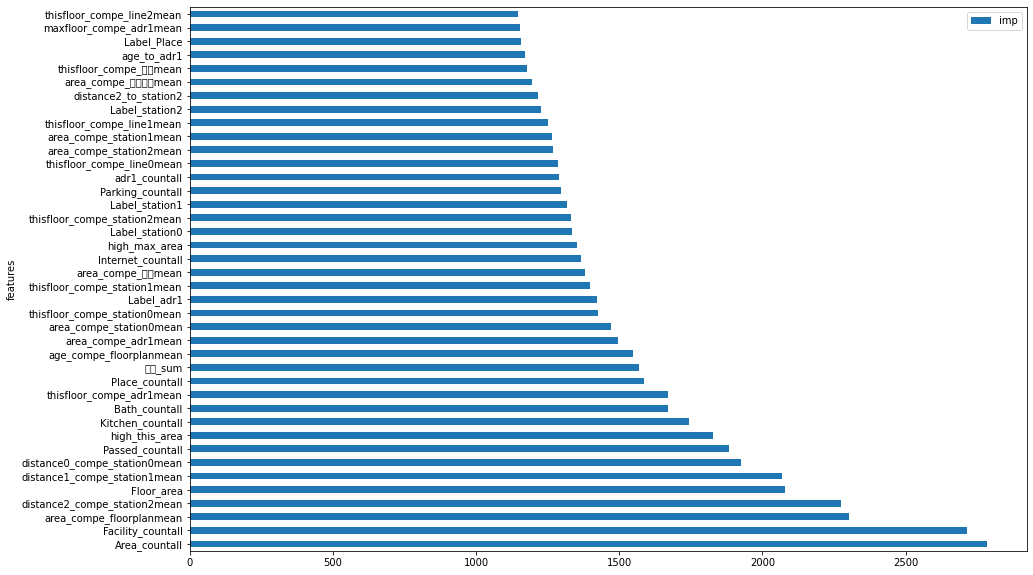

In [ ]:
plot_fi(model,train,n=40)

In [ ]:
cnd_drop = importance[importance.importance<100].index
cnd_train = train.drop(cnd_drop,axis=1)

In [ ]:
train_x,val_x,train_y,val_y = train_test_split(cnd_train,target,test_size=.2)
lgb_params = {
      'objective':'regression',
      'random_seed':seed
  }
lgb_train = lgb.Dataset(train_x,train_y)
lgb_eval = lgb.Dataset(val_x,val_y)
model = lgb.train(lgb_params,
                  lgb_train,
                  valid_sets=lgb_eval,
                  num_boost_round=5000,
                  early_stopping_rounds=200,
                  verbose_eval=0
                  )
pred_eval = model.predict(val_x)
pred_eval = np.exp(pred_eval)
y_val = np.exp(val_y)
rmse = np.sqrt(mean_squared_error(y_val,pred_eval))
print(f'RMSE:{rmse:.5f}')

RMSE:16573.43723


In [ ]:
train_x,val_x,train_y,val_y = train_test_split(train_df,target,test_size=.2)
lgb_params = {
      'objective':'regression',
      'random_seed':seed
  }
lgb_train = lgb.Dataset(train_x,train_y)
lgb_eval = lgb.Dataset(val_x,val_y)
model = lgb.train(lgb_params,
                  lgb_train,
                  valid_sets=lgb_eval,
                  num_boost_round=5000,
                  early_stopping_rounds=200,
                  verbose_eval=0
                  )

NameError: ignored

In [ ]:
pred_eval = model.predict(val_x)
pred_eval = np.exp(pred_eval)
y_val = np.exp(val_y)
rmse = np.sqrt(mean_squared_error(y_val,pred_eval))
print(f'RMSE:{rmse:.5f}')

RMSE:16542.62491


In [ ]:
prediction = model.predict(X_test)
prediction = np.exp(prediction)

In [ ]:
lgb_sub = sub.copy()
lgb_sub[target_col] = prediction
lgb_sub.to_csv(os.path.join(OUTPUT_DIR,'SecondLGBSubmission.csv'),index=None,header=False)
lgb_sub.head(20)

,id,賃料
0,31471,149886.732455
1,31472,118912.469376
2,31473,74199.478541
3,31474,58062.928858
4,31475,136015.433386
5,31476,71850.514123
6,31477,92831.139756
7,31478,98953.319797
8,31479,82929.621769
9,31480,131284.258487


In [ ]:
importance = pd.DataFrame(model.feature_importance(), index=train_df.columns, columns=['importance'])
display(importance)

,importance
Area,8429
Place_countall,5468
Access_countall,1626
Room_countall,1647
Passed_countall,6411
Angle_countall,2420
Area_countall,6618
Floor_countall,4695
Bath_countall,4459
Kitchen_countall,4596


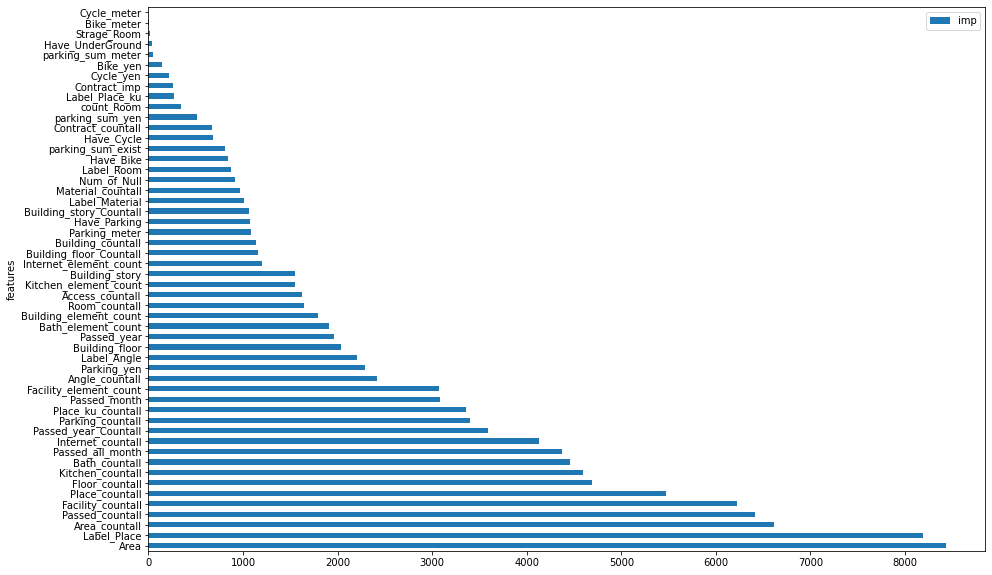

In [ ]:
plot_fi(model,train_df)

In [ ]:
train_x,val_x,train_y,val_y = train_test_split(train_df,target,test_size=.2)
lgb_params = {
      'objective':'regression',
      'random_seed':seed
  }

model = lgb.LGBMRegressor(
                    objective = 'regression',
                    random_state=seed,
                    n_estimators=5000
                  )
model.fit(train_x,train_y)

LGBMRegressor(n_estimators=5000, objective='regression', random_state=2022)

In [ ]:
pred_eval = model.predict(val_x)
pred_eval = np.exp(pred_eval)
y_val = np.exp(val_y)
rmse = np.sqrt(mean_squared_error(y_val,pred_eval))
print(f'RMSE:{rmse:.5f}')

RMSE:18451.68974


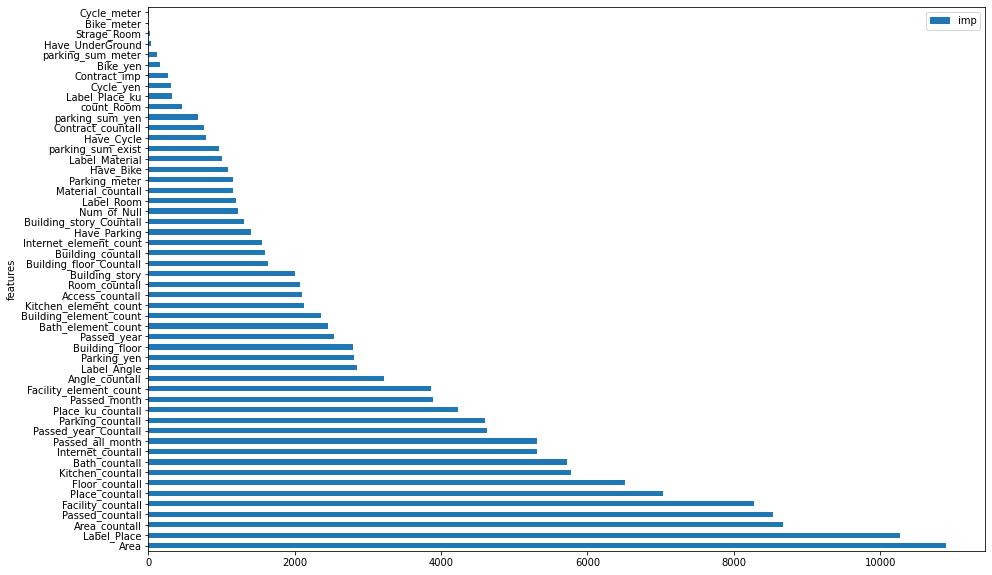

In [ ]:
plot_fi(model,train_df)

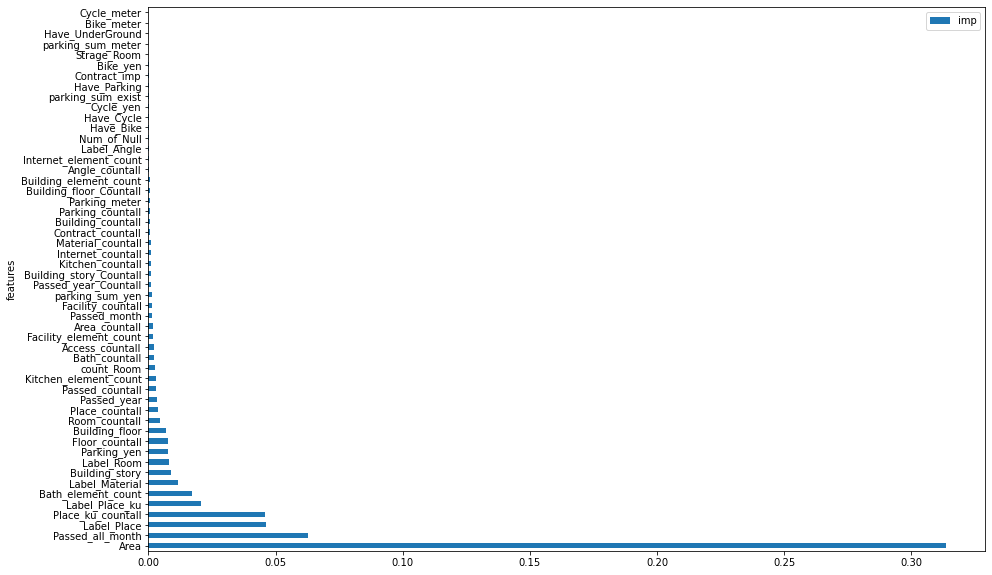

In [ ]:
plot_pi(model,val_x,val_y)

In [ ]:
feats = train.columns
scaler = StandardScaler()
for col in feats:
  train[col] = scaler.fit_transform(train[col].to_numpy().reshape(-1,1))
  test[col] = scaler.fit_transform(test[col].to_numpy().reshape(-1,1))

X = train[feats].to_numpy().astype(np.float64)
target = target.to_numpy().astype(np.float64)
X_test = test[feats].to_numpy().astype(np.float64)

AttributeError: ignored

In [ ]:
lgb_model,lgb_pred = LGBFunction(X,target,X_test)

############### Fold=1 ###############
Fold=1,  RMSE : 14367.14826,   time : 197.06
############### Fold=2 ###############
Fold=2,  RMSE : 22237.46413,   time : 219.65
############### Fold=3 ###############
Fold=3,  RMSE : 13453.78552,   time : 218.55
############### Fold=4 ###############
Fold=4,  RMSE : 14320.47217,   time : 219.08
############### Fold=5 ###############
Fold=5,  RMSE : 13977.52366,   time : 218.38
Mean RMSE : 15671.27875


In [ ]:
lgb_sub = sub.copy()
lgb_sub[target_col] = np.mean(lgb_pred,axis=0)
lgb_sub.to_csv(os.path.join(OUTPUT_DIR,'LGBSubmission3.csv'),index=None,header=False)
lgb_sub.head(20)

,id,賃料
0,31471,122186.174054
1,31472,115517.683304
2,31473,73827.362470
3,31474,57193.568109
4,31475,111404.238824
5,31476,76704.071462
6,31477,92702.814237
7,31478,93824.359938
8,31479,79176.956399
9,31480,135304.818829


In [41]:
def LGBFunctionNolog(X,target,X_test):
  lgb_params = {
      'objective':'regression',
      'random_seed':seed
  }

  lgb_predictions = []
  lgb_scores = []

  kf = KFold(n_splits=5,shuffle=True,random_state=seed)
  for fold,(tr_idx,va_idx) in enumerate(kf.split(X=X,y=target)):
    print('#'*15,f'Fold={fold+1}','#'*15)
    start_time = time.time()

    x_train = X[tr_idx,:]
    y_train = target[tr_idx]
    x_val = X[va_idx,:]
    y_val = target[va_idx]

    lgb_train = lgb.Dataset(x_train,y_train)
    lgb_eval = lgb.Dataset(x_val,y_val)
    model = lgb.train(lgb_params,
                      lgb_train,
                      valid_sets=lgb_eval,
                      num_boost_round=5000,
                      early_stopping_rounds=200,
                      verbose_eval=0
                      )
    pred_eval = model.predict(x_val)
    rmse = np.sqrt(mean_squared_error(y_val,pred_eval))
    runtime = time.time() - start_time
    print(f'Fold={fold+1},  RMSE : {rmse:.5f},   time : {runtime:.2f}')
    prediction = model.predict(X_test)
    lgb_predictions.append(prediction)
    lgb_scores.append(rmse)
  print(f'Mean RMSE : {np.mean(lgb_scores):.5f}')

  return model,lgb_predictions

In [ ]:
nolog_target = orig_train[target_col].to_numpy().astype(np.float64)
nolog_lgb_model,nolog_lgb_pred = LGBFunction(X,nolog_target,X_test)

############### Fold=1 ###############


ValueError: ignored

In [ ]:
cat_model,cat_pred = CatFunction(X,target,X_test)